In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation, Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
X=df.drop('FAULT',axis=1)
y=df['FAULT']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

In [ ]:
X_train_norm = np.expand_dims(X_train_norm, 2)

In [9]:
model = Sequential()

model.add(LSTM(units = 175, return_sequences = True, input_shape = (X_train_norm.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer 
model.add(LSTM(units = 175, return_sequences = True))
print(model.layers)
model.add(Dropout(0.2))

# Adding a third LSTM layer 
model.add(LSTM(units = 175, return_sequences = True))
print(model.layers)
model.add(Dropout(0.2))

# Adding a fourth LSTM layer 
model.add(LSTM(units = 175, return_sequences = True))
print(model.layers)
model.add(Dropout(0.2))

# Adding a fifth LSTM layer 
model.add(LSTM(units = 175))            # return_sequences is False in the last layer
print(model.layers)               
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.add(Activation('relu'))

model.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',metrics=['accuracy'])

W0703 18:36:44.840990 139889776564096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 18:36:44.865660 139889776564096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 18:36:44.868775 139889776564096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0703 18:36:45.123238 139889776564096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0703 18:36:45.134032 

[<keras.layers.recurrent.LSTM object at 0x7f3a5ed646a0>, <keras.layers.core.Dropout object at 0x7f3a5ed647b8>, <keras.layers.recurrent.LSTM object at 0x7f3a5ed64b70>]
[<keras.layers.recurrent.LSTM object at 0x7f3a5ed646a0>, <keras.layers.core.Dropout object at 0x7f3a5ed647b8>, <keras.layers.recurrent.LSTM object at 0x7f3a5ed64b70>, <keras.layers.core.Dropout object at 0x7f3a5abe1128>, <keras.layers.recurrent.LSTM object at 0x7f3a5ac2f470>]
[<keras.layers.recurrent.LSTM object at 0x7f3a5ed646a0>, <keras.layers.core.Dropout object at 0x7f3a5ed647b8>, <keras.layers.recurrent.LSTM object at 0x7f3a5ed64b70>, <keras.layers.core.Dropout object at 0x7f3a5abe1128>, <keras.layers.recurrent.LSTM object at 0x7f3a5ac2f470>, <keras.layers.core.Dropout object at 0x7f3a5a8e2b38>, <keras.layers.recurrent.LSTM object at 0x7f3a5a9f3cf8>]


W0703 18:36:46.361891 139889776564096 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



[<keras.layers.recurrent.LSTM object at 0x7f3a5ed646a0>, <keras.layers.core.Dropout object at 0x7f3a5ed647b8>, <keras.layers.recurrent.LSTM object at 0x7f3a5ed64b70>, <keras.layers.core.Dropout object at 0x7f3a5abe1128>, <keras.layers.recurrent.LSTM object at 0x7f3a5ac2f470>, <keras.layers.core.Dropout object at 0x7f3a5a8e2b38>, <keras.layers.recurrent.LSTM object at 0x7f3a5a9f3cf8>, <keras.layers.core.Dropout object at 0x7f3a5a79fb38>, <keras.layers.recurrent.LSTM object at 0x7f3a5a6d1e10>]


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20, 175)           123900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 175)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 175)           245700    
_________________________________________________________________
dropout_2 (Dropout)          (None, 20, 175)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20, 175)           245700    
_________________________________________________________________
dropout_3 (Dropout)          (None, 20, 175)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 20, 175)           245700    
__________

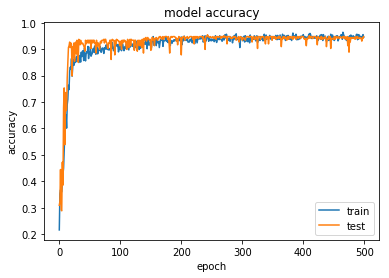

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

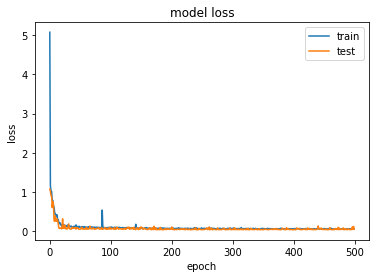

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()